# Flight Delay: Exploratory Data Analysis

[Flight Delay Dataset](https://www.kaggle.com/datasets/arvindnagaonkar/flight-delay)

## Table of Contents
1. [Introduction](#p1)
2. [Importing Dependancies and Data](#p2)
3. [Understanding the Data](#p3)
4. [Preprocessing Data](#p4)
5. [Exploratory Data Analysis](#p5)
    * [Analyzing Departure Delay](#p5.1)
    * [Analyzing Arrival Delay](#p5.2)
    * [Components of Arrival Delay](#p5.3)
6. [Conclusion](#p6)

## <a name=p1>Introduction</a>

![](https://images.unsplash.com/photo-1522199873717-bc67b1a5e32b?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=2672&q=80)

In today's fast-paced world, air travel has become an integral part of our lives. However, the reliability of flight schedules can greatly impact travel experiences and plans. Flight delays are a common concern for passengers, airlines, and airports alike. Exploring the patterns and causes of flight delays is crucial for understanding the dynamics of air travel and identifying potential areas for improvement.

The objective of this project is to perform an in-depth Exploratory Data Analysis (EDA) on a comprehensive dataset of flight information, with a primary focus on understanding flight delay patterns. By analyzing this data, we aim to uncover insights into the factors that contribute to flight delays, the distribution of delays across different airlines and airports, and the temporal and geographical trends that might influence delay occurrences.

## <a name=p2>Importing Dependancies and Data</a>

In [55]:
# Importing Dependancies
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import us  # Import the us library

In [2]:
# Always Display all the columns
pd.set_option('display.max_columns',None)

# Importing Data
flights = pd.read_parquet('Flight_Delay.parquet')

# Ressetting the index
flights.reset_index(drop = True, inplace = True)

In [3]:
# Displaying the Dataset
flights

,Year,Month,DayofMonth,FlightDate,Marketing_Airline_Network,OriginCityName,DestCityName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018,1,15,2018-01-15,UA,"Newark, NJ","Charleston, SC",1845,1928.0,43.0,43.0,35.0,2003.0,2145.0,4.0,2108,2149.0,41.0,41.0,143.0,141.0,102.0,628.0,3,41.0,0.0,0.0,0.0,0.0
1,2018,1,16,2018-01-16,UA,"Newark, NJ","Charleston, SC",1835,1956.0,81.0,81.0,18.0,2014.0,2202.0,5.0,2058,2207.0,69.0,69.0,143.0,131.0,108.0,628.0,3,67.0,0.0,0.0,0.0,2.0
2,2018,1,17,2018-01-17,UA,"Newark, NJ","Charleston, SC",1835,1836.0,1.0,1.0,19.0,1855.0,2048.0,6.0,2058,2054.0,-4.0,0.0,143.0,138.0,113.0,628.0,3,0.0,0.0,0.0,0.0,0.0
3,2018,1,18,2018-01-18,UA,"Newark, NJ","Charleston, SC",1845,1844.0,-1.0,0.0,36.0,1920.0,2052.0,6.0,2108,2058.0,-10.0,0.0,143.0,134.0,92.0,628.0,3,0.0,0.0,0.0,0.0,0.0
4,2018,1,20,2018-01-20,UA,"Newark, NJ","Charleston, SC",1835,1829.0,-6.0,0.0,22.0,1851.0,2020.0,6.0,2058,2026.0,-32.0,0.0,143.0,117.0,89.0,628.0,3,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30132667,2023,4,26,2023-04-26,UA,"Houston, TX","San Francisco, CA",1234,1230.0,-4.0,0.0,19.0,1249.0,1426.0,5.0,1452,1431.0,-21.0,0.0,258.0,241.0,217.0,1635.0,7,0.0,0.0,0.0,0.0,0.0
30132668,2023,4,26,2023-04-26,UA,"Chicago, IL","Philadelphia, PA",1104,1100.0,-4.0,0.0,18.0,1118.0,1340.0,8.0,1412,1348.0,-24.0,0.0,128.0,108.0,82.0,678.0,3,0.0,0.0,0.0,0.0,0.0
30132669,2023,4,26,2023-04-26,UA,"Las Vegas, NV","Chicago, IL",1249,1247.0,-2.0,0.0,17.0,1304.0,1808.0,16.0,1829,1824.0,-5.0,0.0,220.0,217.0,184.0,1514.0,7,0.0,0.0,0.0,0.0,0.0
30132670,2023,4,26,2023-04-26,UA,"Miami, FL","Newark, NJ",751,739.0,-12.0,0.0,14.0,753.0,1017.0,20.0,1100,1037.0,-23.0,0.0,189.0,178.0,144.0,1085.0,5,0.0,0.0,0.0,0.0,0.0


## <a name=p3>Understanding the Data</a>

In [4]:
# Checking the name of the columns
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'FlightDate',
       'Marketing_Airline_Network', 'OriginCityName', 'DestCityName',
       'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',
       'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
# Checking the info about each columns
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30132672 entries, 0 to 30132671
Data columns (total 29 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year                       int64  
 1   Month                      int64  
 2   DayofMonth                 int64  
 3   FlightDate                 object 
 4   Marketing_Airline_Network  object 
 5   OriginCityName             object 
 6   DestCityName               object 
 7   CRSDepTime                 int64  
 8   DepTime                    float64
 9   DepDelay                   float64
 10  DepDelayMinutes            float64
 11  TaxiOut                    float64
 12  WheelsOff                  float64
 13  WheelsOn                   float64
 14  TaxiIn                     float64
 15  CRSArrTime                 int64  
 16  ArrTime                    float64
 17  ArrDelay                   float64
 18  ArrDelayMinutes            float64
 19  CRSElapsedTime             float64
 20  

No null values in any of the columns

In [6]:
# Removing duplicates(if any)
flights.drop_duplicates

<bound method DataFrame.drop_duplicates of           Year  Month  DayofMonth  FlightDate Marketing_Airline_Network  \
0         2018      1          15  2018-01-15                        UA   
1         2018      1          16  2018-01-16                        UA   
2         2018      1          17  2018-01-17                        UA   
3         2018      1          18  2018-01-18                        UA   
4         2018      1          20  2018-01-20                        UA   
...        ...    ...         ...         ...                       ...   
30132667  2023      4          26  2023-04-26                        UA   
30132668  2023      4          26  2023-04-26                        UA   
30132669  2023      4          26  2023-04-26                        UA   
30132670  2023      4          26  2023-04-26                        UA   
30132671  2023      4          26  2023-04-26                        UA   

         OriginCityName       DestCityName  CRSDepTime  

In [7]:
# Checking unique values for Marketing_Airline_Network
flights['Marketing_Airline_Network'].unique()

array(['UA', 'DL', 'F9', 'NK', 'AA', 'WN', 'AS', 'HA', 'VX', 'B6', 'G4'],
      dtype=object)

## <a name=p4>Preprocessing Data<a/>

* Deleting Year, Month and DayofMonth columns from the data as the same record is available in the FlightDate column
* FlightDate column is of object DType, converting to DateTime DType and renaming to DepDate
* Splitting Origin and Destination columns to City and State columns
* Mapping Marketing_Airline_Network to Carrier Name in a new column

In [8]:
# Converting float columns to int
float_cols = flights.select_dtypes(include = 'float64').columns
flights[float_cols] = flights[float_cols].astype('int')

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30132672 entries, 0 to 30132671
Data columns (total 29 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   Year                       int64 
 1   Month                      int64 
 2   DayofMonth                 int64 
 3   FlightDate                 object
 4   Marketing_Airline_Network  object
 5   OriginCityName             object
 6   DestCityName               object
 7   CRSDepTime                 int64 
 8   DepTime                    int32 
 9   DepDelay                   int32 
 10  DepDelayMinutes            int32 
 11  TaxiOut                    int32 
 12  WheelsOff                  int32 
 13  WheelsOn                   int32 
 14  TaxiIn                     int32 
 15  CRSArrTime                 int64 
 16  ArrTime                    int32 
 17  ArrDelay                   int32 
 18  ArrDelayMinutes            int32 
 19  CRSElapsedTime             int32 
 20  ActualElapsedTime     

In [9]:
#Converting FlightDate to datetime dtype
flights['DepDate'] = pd.to_datetime(flights['FlightDate'])

# Dropping the above mentioned columns
flights.drop(['FlightDate', 'Year', 'Month', 'DayofMonth'], axis = 1, inplace = True)

flights.head()

,Marketing_Airline_Network,OriginCityName,DestCityName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepDate
0,UA,"Newark, NJ","Charleston, SC",1845,1928,43,43,35,2003,2145,4,2108,2149,41,41,143,141,102,628,3,41,0,0,0,0,2018-01-15
1,UA,"Newark, NJ","Charleston, SC",1835,1956,81,81,18,2014,2202,5,2058,2207,69,69,143,131,108,628,3,67,0,0,0,2,2018-01-16
2,UA,"Newark, NJ","Charleston, SC",1835,1836,1,1,19,1855,2048,6,2058,2054,-4,0,143,138,113,628,3,0,0,0,0,0,2018-01-17
3,UA,"Newark, NJ","Charleston, SC",1845,1844,-1,0,36,1920,2052,6,2108,2058,-10,0,143,134,92,628,3,0,0,0,0,0,2018-01-18
4,UA,"Newark, NJ","Charleston, SC",1835,1829,-6,0,22,1851,2020,6,2058,2026,-32,0,143,117,89,628,3,0,0,0,0,0,2018-01-20


In [10]:
# Splitting OriginCityName
flights[['OriginCity', 'OriginState']] = flights['OriginCityName'].str.split(', ', expand = True)

# Splitting DestCityName
flights[['DestCity','DestState']] = flights['DestCityName'].str.split(', ', expand = True)

# Dropping the original columns
flights.drop(['OriginCityName', 'DestCityName'], axis = 1, inplace = True)

flights[['OriginCity', 'OriginState', 'DestCity', 'DestState']]

,OriginCity,OriginState,DestCity,DestState
0,Newark,NJ,Charleston,SC
1,Newark,NJ,Charleston,SC
2,Newark,NJ,Charleston,SC
3,Newark,NJ,Charleston,SC
4,Newark,NJ,Charleston,SC
...,...,...,...,...
30132667,Houston,TX,San Francisco,CA
30132668,Chicago,IL,Philadelphia,PA
30132669,Las Vegas,NV,Chicago,IL
30132670,Miami,FL,Newark,NJ


In [12]:
# A function tp return the abbreviated state names to its full name
def state_fullname(state):
    state_name = us.states.lookup(state)
    if state_name is not None:
        return state_name.name
    else:
        return state

# Appling the mapping function
flights['OriginState'] = flights['OriginState'].apply(state_fullname)
flights['DestState'] = flights['DestState'].apply(state_fullname)

pd.concat([flights['OriginState'], flights['DestState']]).unique()

array(['New Jersey', 'Rhode Island', 'Illinois', 'Louisiana', 'Texas',
       'Mississippi', 'Oklahoma', 'South Carolina', 'Alabama', 'Arkansas',
       'Iowa', 'Vermont', 'Georgia', 'West Virginia', 'Kentucky',
       'Tennessee', 'Minnesota', 'Virginia', 'Ohio', 'Michigan',
       'New York', 'Florida', 'Nebraska', 'Pennsylvania',
       'North Carolina', 'Connecticut', 'Missouri', 'Wisconsin',
       'Indiana', 'Massachusetts', 'Maine', 'DC', 'Colorado', 'Nevada',
       'California', 'Utah', 'New Mexico', 'Arizona', 'Washington',
       'Oregon', 'Puerto Rico', 'Maryland', 'New Hampshire', 'Montana',
       'Idaho', 'Hawaii', 'Alaska', 'Wyoming', 'TT', 'Kansas',
       'South Dakota', 'Virgin Islands', 'North Dakota', 'Delaware'],
      dtype=object)

* TT -> Trust Territory
* DC -> Washington, D.C.

In [15]:
# Creating a new column with Carrier Name
flights.loc[flights['Marketing_Airline_Network'] == 'UA', 'CarrierName'] = 'United Airlines'
flights.loc[flights['Marketing_Airline_Network'] == 'DL', 'CarrierName'] = 'Delta Airlines'
flights.loc[flights['Marketing_Airline_Network'] == 'F9', 'CarrierName'] = 'Frontier Airlines'
flights.loc[flights['Marketing_Airline_Network'] == 'NK', 'CarrierName'] = 'Spirit Airlines'
flights.loc[flights['Marketing_Airline_Network'] == 'AA', 'CarrierName'] = 'American Airlines'
flights.loc[flights['Marketing_Airline_Network'] == 'WN', 'CarrierName'] = 'Southwest Airlines'
flights.loc[flights['Marketing_Airline_Network'] == 'AS', 'CarrierName'] = 'Alaska Airlines'
flights.loc[flights['Marketing_Airline_Network'] == 'HA', 'CarrierName'] = 'Hawaiian Airlines'
flights.loc[flights['Marketing_Airline_Network'] == 'VX', 'CarrierName'] = 'Virgin America'
flights.loc[flights['Marketing_Airline_Network'] == 'B6', 'CarrierName'] = 'JetBlue Airways'
flights.loc[flights['Marketing_Airline_Network'] == 'G4', 'CarrierName'] = 'Allegiant Air'

flights['CarrierName'].unique()

array(['United Airlines', 'Delta Airlines', 'Frontier Airlines',
       'Spirit Airlines', 'American Airlines', 'Southwest Airlines',
       'Alaska Airlines', 'Hawaiian Airlines', 'Virgin America',
       'JetBlue Airways', 'Allegiant Air'], dtype=object)

In [17]:
# Final Columns
final_columns = ['DepDate', 'Marketing_Airline_Network', 'CarrierName', 'OriginCity', 'OriginState', 'DestCity',
                'DestState', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'TaxiOut', 'WheelsOff', 'WheelsOn', 
                'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 
                'AirTime', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                'SecurityDelay', 'LateAircraftDelay']

flights=flights[final_columns]

flights

,DepDate,Marketing_Airline_Network,CarrierName,OriginCity,OriginState,DestCity,DestState,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2018-01-15,UA,United Airlines,Newark,New Jersey,Charleston,South Carolina,1845,1928,43,43,35,2003,2145,4,2108,2149,41,41,143,141,102,628,3,41,0,0,0,0
1,2018-01-16,UA,United Airlines,Newark,New Jersey,Charleston,South Carolina,1835,1956,81,81,18,2014,2202,5,2058,2207,69,69,143,131,108,628,3,67,0,0,0,2
2,2018-01-17,UA,United Airlines,Newark,New Jersey,Charleston,South Carolina,1835,1836,1,1,19,1855,2048,6,2058,2054,-4,0,143,138,113,628,3,0,0,0,0,0
3,2018-01-18,UA,United Airlines,Newark,New Jersey,Charleston,South Carolina,1845,1844,-1,0,36,1920,2052,6,2108,2058,-10,0,143,134,92,628,3,0,0,0,0,0
4,2018-01-20,UA,United Airlines,Newark,New Jersey,Charleston,South Carolina,1835,1829,-6,0,22,1851,2020,6,2058,2026,-32,0,143,117,89,628,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30132667,2023-04-26,UA,United Airlines,Houston,Texas,San Francisco,California,1234,1230,-4,0,19,1249,1426,5,1452,1431,-21,0,258,241,217,1635,7,0,0,0,0,0
30132668,2023-04-26,UA,United Airlines,Chicago,Illinois,Philadelphia,Pennsylvania,1104,1100,-4,0,18,1118,1340,8,1412,1348,-24,0,128,108,82,678,3,0,0,0,0,0
30132669,2023-04-26,UA,United Airlines,Las Vegas,Nevada,Chicago,Illinois,1249,1247,-2,0,17,1304,1808,16,1829,1824,-5,0,220,217,184,1514,7,0,0,0,0,0
30132670,2023-04-26,UA,United Airlines,Miami,Florida,Newark,New Jersey,751,739,-12,0,14,753,1017,20,1100,1037,-23,0,189,178,144,1085,5,0,0,0,0,0


## <a name=p5>Exploratory Data Analysis</a>

### <a name=p5.1>Analyzing Depature Delay<a/>

In [18]:
dep_delay = flights[['DepDate', 'Marketing_Airline_Network', 'CarrierName', 'OriginCity', 'OriginState', 'CRSDepTime', 
                     'DepTime', 'DepDelay']]

**Distribution of Departure Delay**

count    3.013267e+07
mean     1.061144e+01
std      5.198293e+01
min     -3.420000e+02
25%     -6.000000e+00
50%     -3.000000e+00
75%      3.000000e+00
max      7.223000e+03
Name: DepDelay, dtype: float64


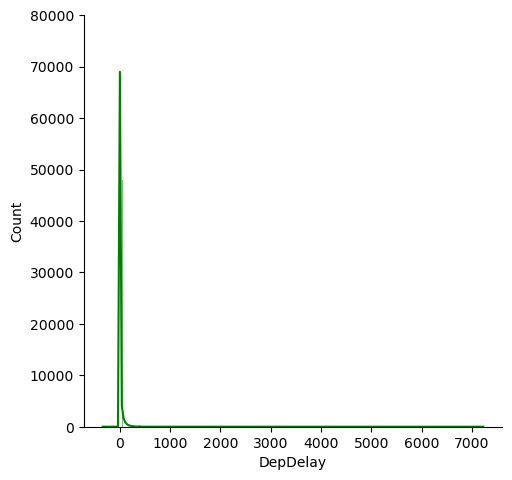

In [25]:
print(dep_delay['DepDelay'].describe())

sns.displot(dep_delay['DepDelay'], color='g', kde=True)
plt.ylim(0,80000)
plt.show()

In [24]:
# Skewness and Kurtosis Index
print("Skewness: %f" %dep_delay['DepDelay'].skew())
print("Kurtosis: %f" %dep_delay['DepDelay'].kurt())

Skewness: 10.492220
Kurtosis: 218.513245


From histogram and by skewness and kurtosis index, the departure delays are mostly located to the right side of the graph with a very long tail to the right. The majority of delays are short and the longer delays, while unusual are more heavily loaded in time.

**Departure Delay by time of the day**

<Axes: xlabel='CRSDepTime', ylabel='DepDelay'>

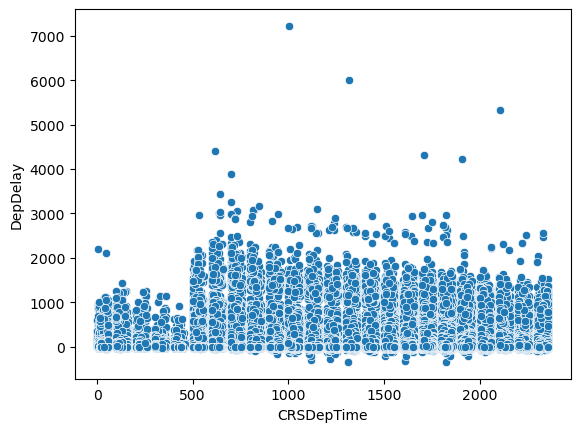

In [26]:
sns.scatterplot(data = dep_delay, x = 'CRSDepTime', y = 'DepDelay')

The duration of departure delay w.r.t. time of scheduled  departure increases in the morning and then slowly decreases towards the end of the day.

**Departure Delay through the years**

<Axes: xlabel='DepDate', ylabel='DepDelay'>

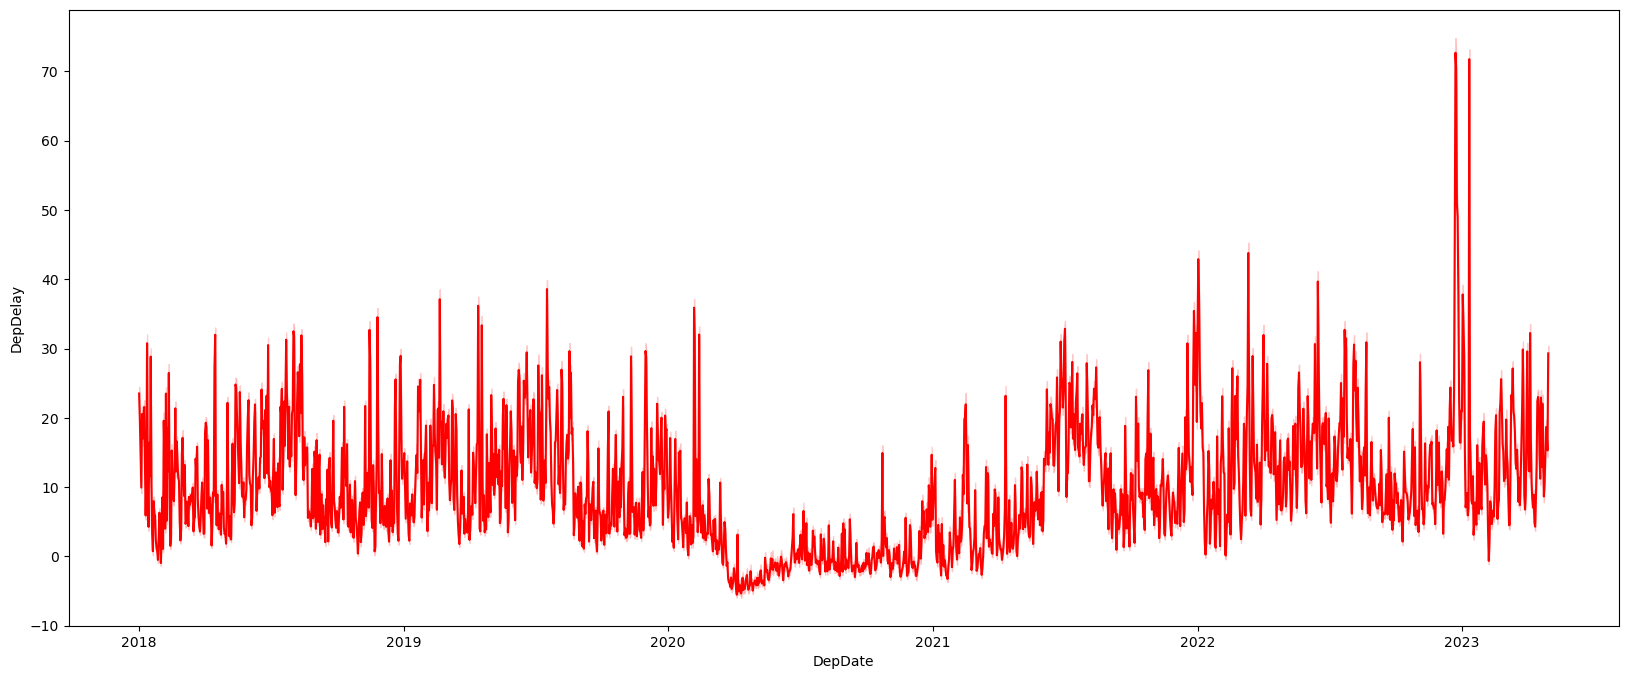

In [34]:
plt.figure(figsize = (20,8))

sns.lineplot(data = dep_delay[['DepDate', 'DepDelay']], x = 'DepDate', y = 'DepDelay', color = 'r')

From the above line plot, we can see that the number of departure delays were very less in the year 2020. This was due to COVID-19 pandemic.

**Departure Delay by Airline Network through the years**

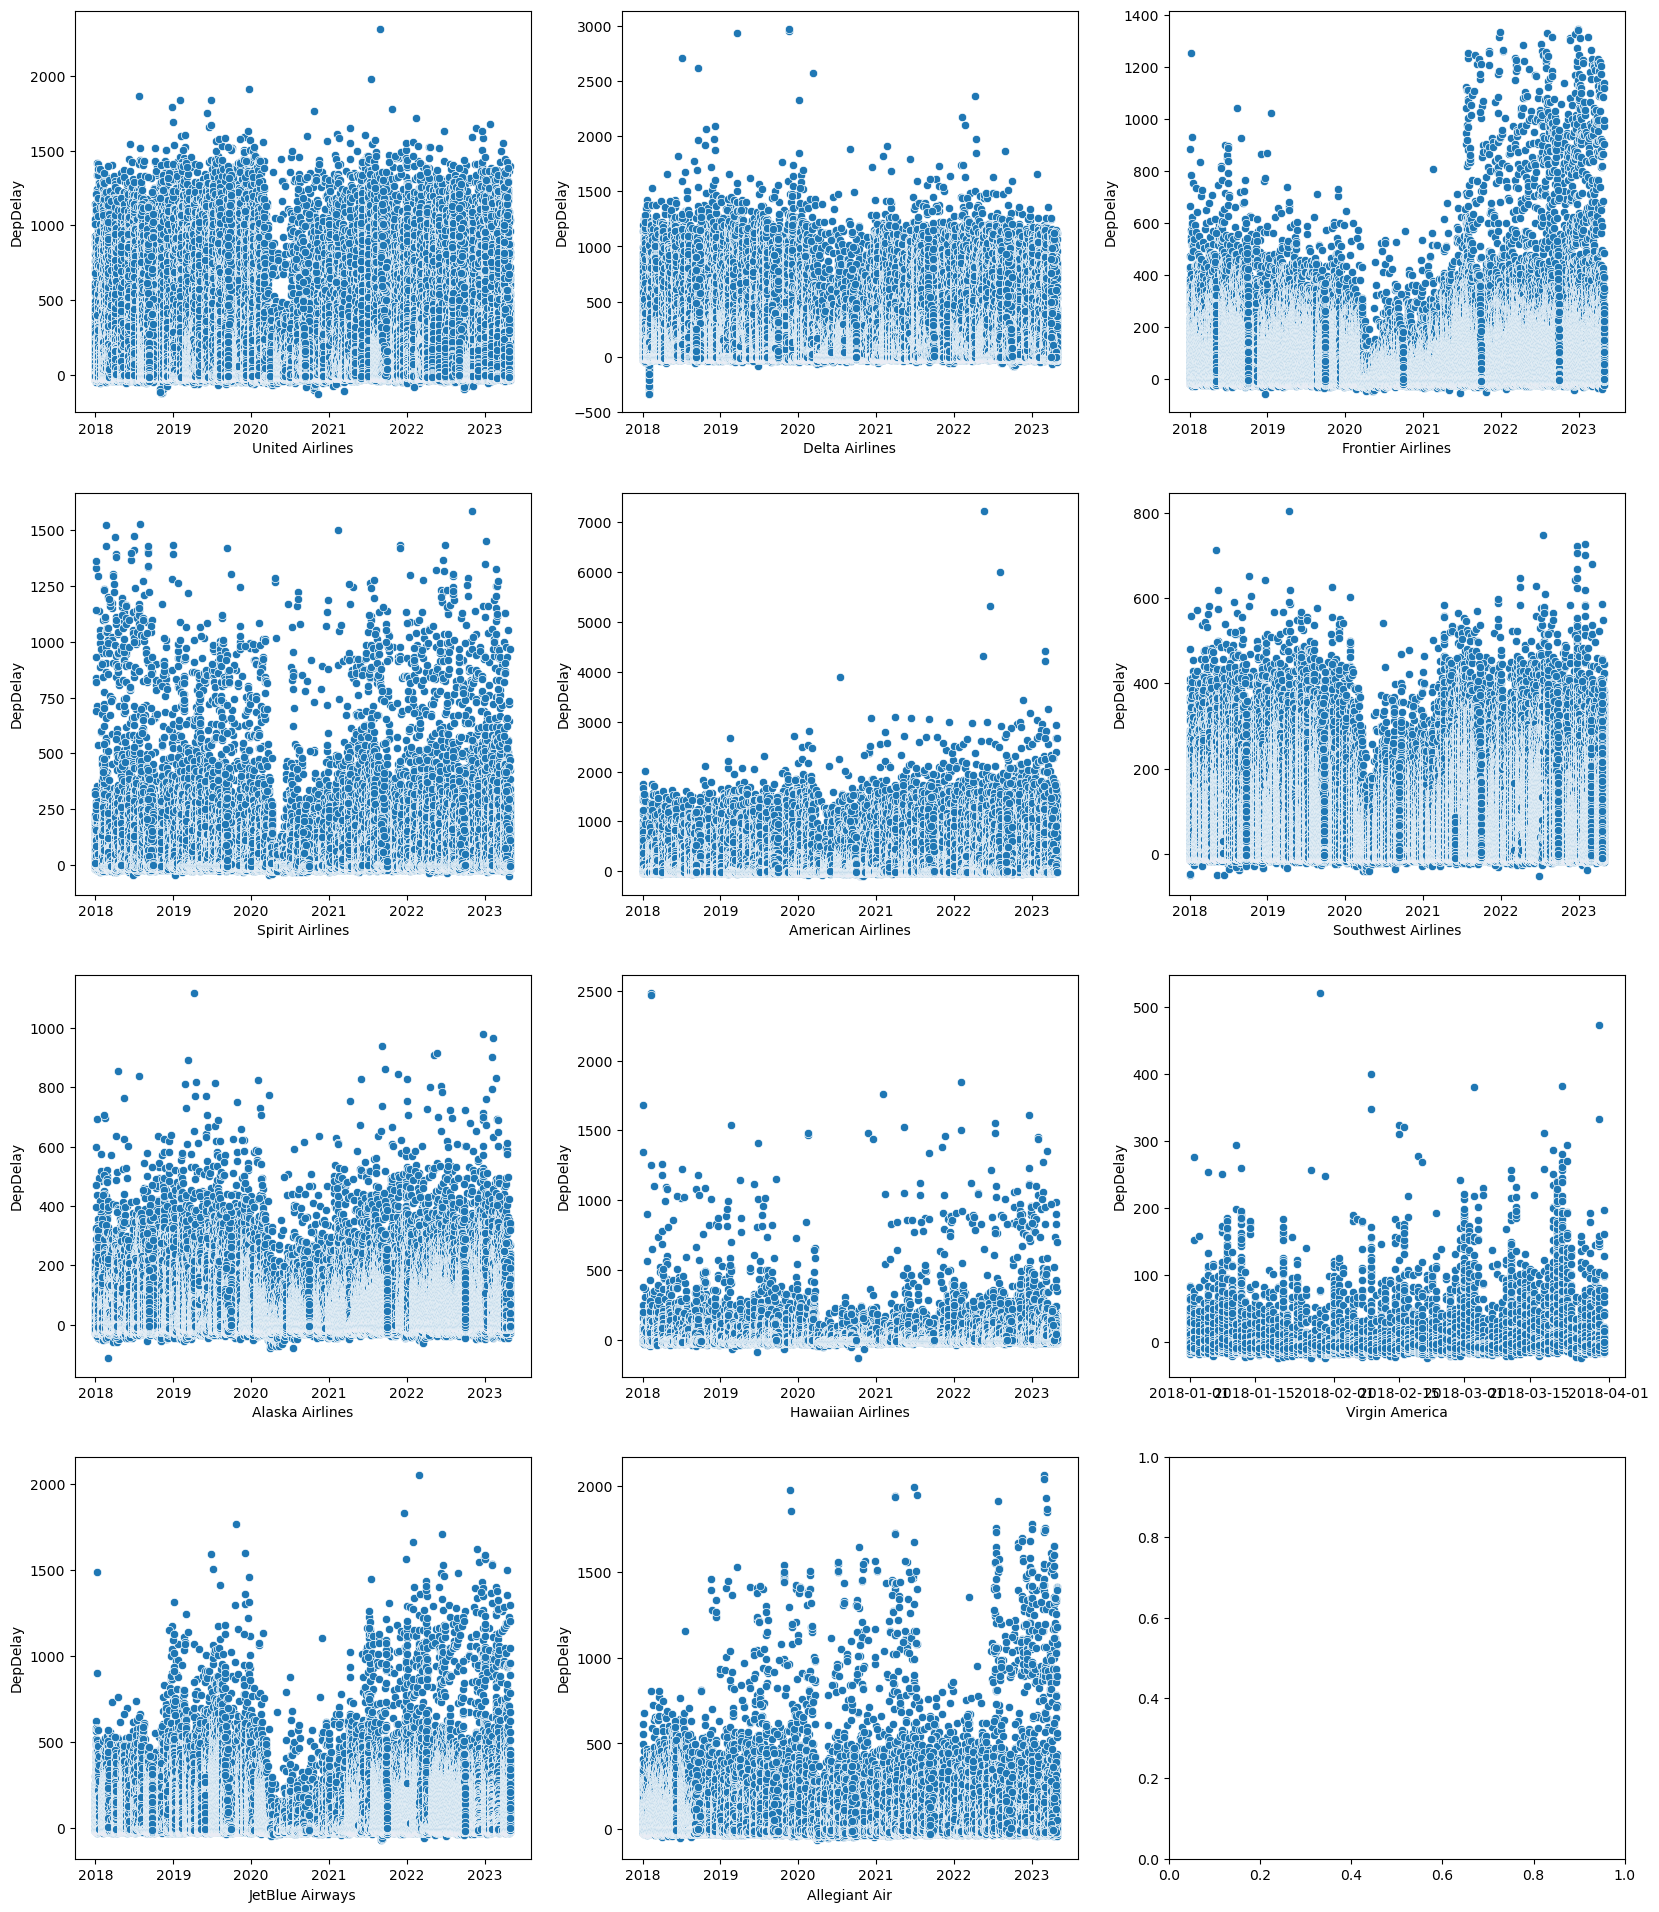

In [27]:
f, ax = plt.subplots(round(len(dep_delay['CarrierName'].unique())/3), 3, figsize = (20,24))
for i, ax in enumerate(f.axes):
    if i < len(dep_delay['CarrierName'].unique()):
        sns.scatterplot(data = dep_delay.loc[dep_delay['CarrierName'] == dep_delay['CarrierName'].unique()[i]], 
                        x = 'DepDate', y = 'DepDelay', ax = ax)
        ax.set_xlabel(dep_delay['CarrierName'].unique()[i])

In [117]:
print(dep_delay.loc[dep_delay['Marketing_Airline_Network'] == 'VX'].DepDate.min())
print(dep_delay.loc[dep_delay['Marketing_Airline_Network'] == 'VX'].DepDate.max())

2018-01-01 00:00:00
2018-03-31 00:00:00


In [47]:
print(dep_delay.loc[dep_delay['Marketing_Airline_Network'] == 'WN'].DepDelay.count())
print(dep_delay.loc[dep_delay['Marketing_Airline_Network'] == 'HA'].DepDelay.count())

5210031
289961


- From the above plots, it can be seen that for the Frontier Airlines there have been increase for number of long delays in the past couple of years
- Departure delays of Virgin Airlines are shorter as compared to other airlines, although we only have 3 months of data from 2018 for this airline
- Apart from Virgin Airlines, departure delays of Hawaiian and Southwest Airlines have similarly shorter delays but delay count of Southwest Airline 18 times more than Hawaiian Airlines

**Top 50 cities with highest number of departure delays and average departure delay**

<Axes: xlabel='DepDelay', ylabel='OriginCity'>

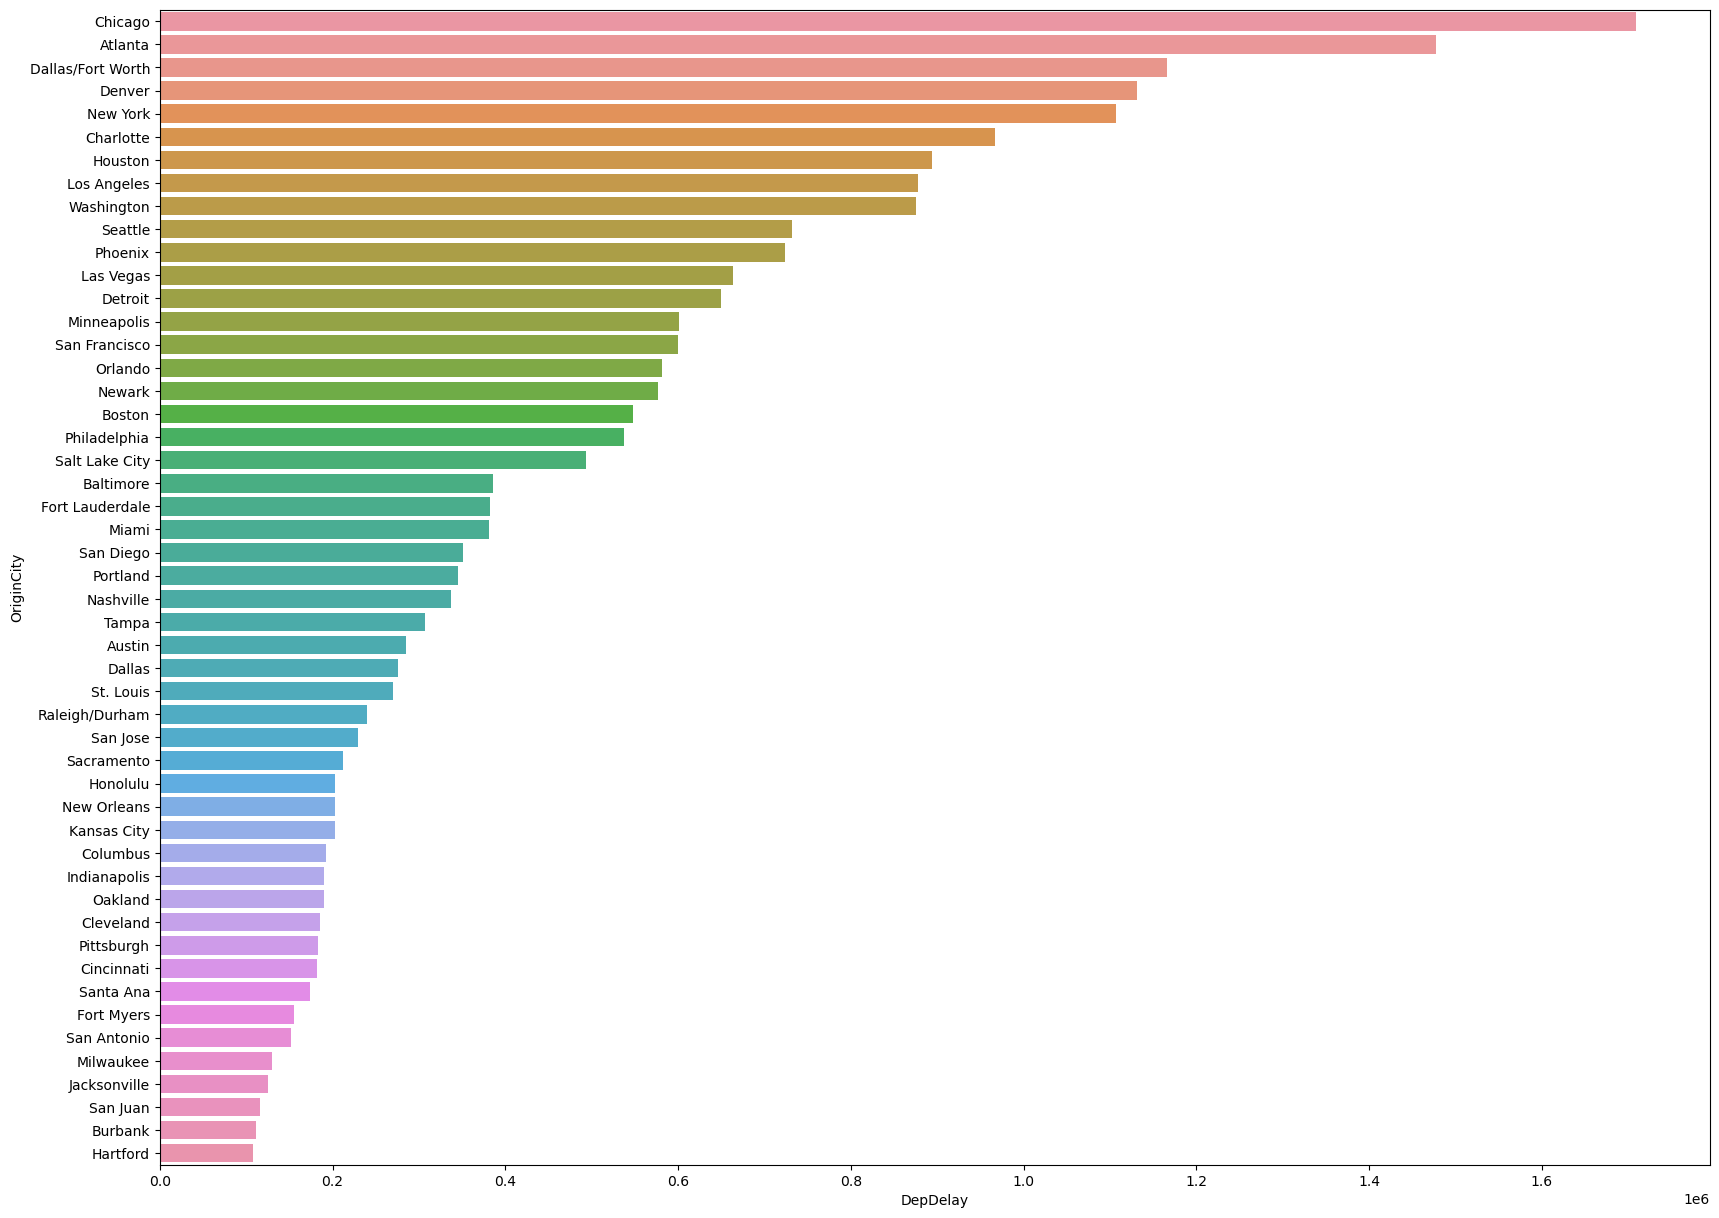

In [18]:
plt.figure(figsize = (20,15))
sns.barplot(data = dep_delay_flights[['OriginCity','DepDelay']].groupby(['OriginCity']).count()
            .sort_values(by = 'DepDelay', ascending = False).head(50).reset_index(), 
            x = 'DepDelay', y = 'OriginCity')

**Top 10 cities with highest average delay in minutes**

<Axes: xlabel='DepDelay', ylabel='OriginCity'>

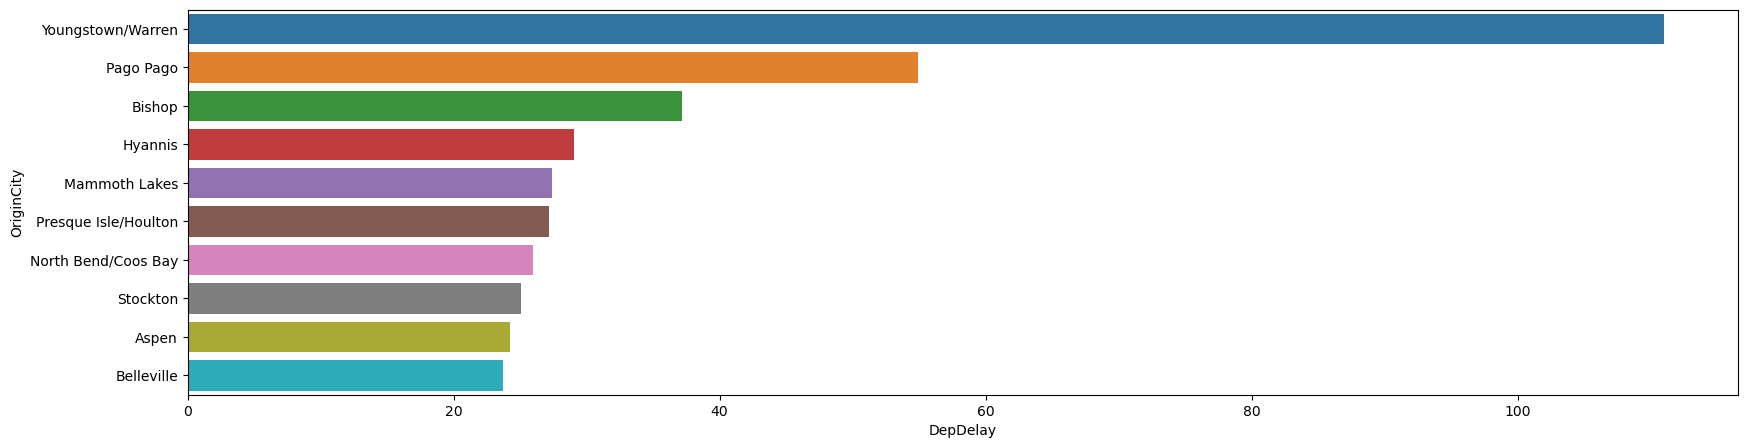

In [19]:
plt.figure(figsize = (20,5))
sns.barplot(data = dep_delay_flights[['OriginCity','DepDelay']].groupby(['OriginCity']).mean()
            .sort_values(by = 'DepDelay', ascending = False).head(10).reset_index(), 
            x = 'DepDelay', y = 'OriginCity')

### <a name=p5.2>Analyzing Arrival Delay<a/>

**Arrival delay is the sum of CarrierDelay, WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay**

In [29]:
arr_delay = flights[['DepDate', 'Marketing_Airline_Network', 'CarrierName', 'OriginCity', 'OriginState', 'DestCity', 
                          'DestState', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 
                          'CRSArrTime', 'ArrTime', 'ArrDelay', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 
                          'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

<Axes: >

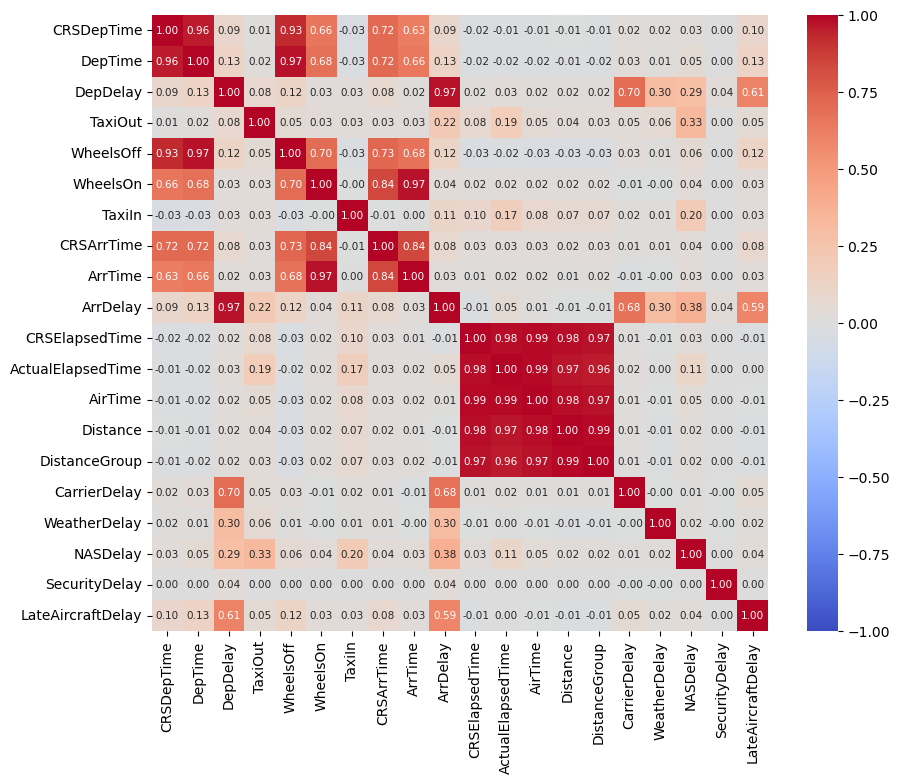

In [96]:
correlation_matrix = arr_delay.select_dtypes(include=['number']).corr()

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', vmax = 1.0, vmin = -1.0, annot = True, fmt = '.2f', 
            annot_kws = {'size':7.5}, square = True)

- Arrival Delay show a good correlation to Carrier Delay and slightly with Weather Delay, LateAircraftDelay & NASDelay
- Arrival Delay is heavily affected because of departure delay
- Remaining pair of variables with high correlation coefficients has to be ignored, because either they are derived features or timestamps

**Distribution of Departure Delay**

count    3.013267e+07
mean     3.754417e+00
std      5.454628e+01
min     -1.290000e+03
25%     -1.700000e+01
50%     -9.000000e+00
75%     -1.000000e+00
max      7.232000e+03
Name: ArrDelay, dtype: float64


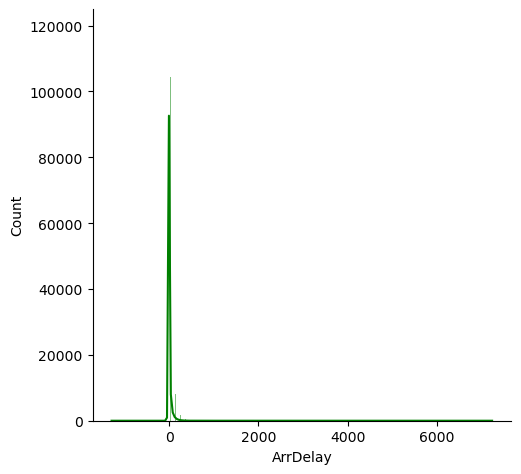

In [53]:
print(arr_delay['ArrDelay'].describe())

sns.displot(arr_delay['ArrDelay'], color = 'g', kde = True)
plt.ylim(0,125000)
plt.show()

In [61]:
# Skewness and Kurtosis Index
print("Skewness: %f" %arr_delay['ArrDelay'].skew())
print("Kurtosis: %f" %arr_delay['ArrDelay'].kurt())

Skewness: 9.310980
Kurtosis: 183.284548


From histogram and by skewness and kurtosis index, the departure delays are mostly located to the right side of the graph with a very long tail to the right. The majority of delays are short and the longer delays, while unusual are more heavyily loaded in time.

**Relationship between Arrival Delay and Departure Delay**

<Axes: xlabel='DepDelay', ylabel='ArrDelay'>

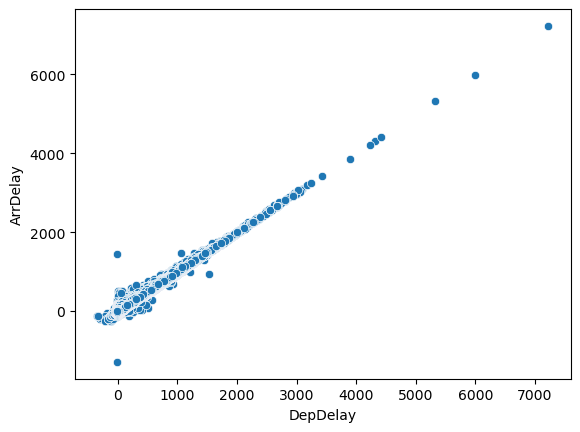

In [66]:
sns.scatterplot(data = arr_delay[['DepDelay','ArrDelay']], x = 'DepDelay', y = 'ArrDelay')

Correlation matrix had shown a strong relationship of departure and arrival delays. The above scatter plot illustrates the same.

**Arrival delay w.r.t. scheduled daparture and arrival time**

Text(0.5, 1.0, 'Arrival Delay by Scheduled Arrival Time')

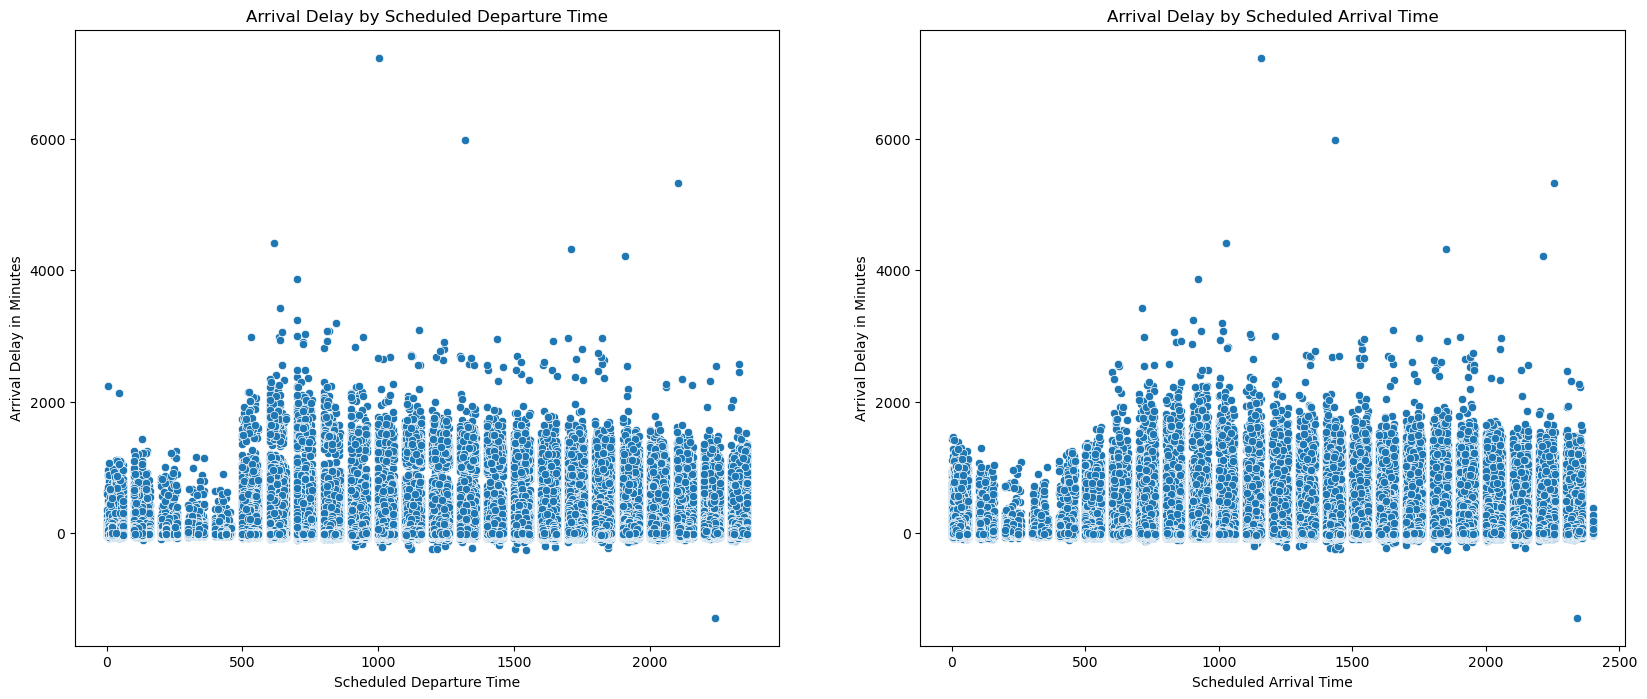

In [67]:
f, ax = plt.subplots(1, 2, figsize = (20,8))

sns.scatterplot(data = arr_delay, x = 'CRSDepTime', y = 'ArrDelay', ax = ax[0])
ax[0].set_xlabel('Scheduled Departure Time')
ax[0].set_ylabel('Arrival Delay in Minutes')
ax[0].set_title('Arrival Delay by Scheduled Departure Time')

sns.scatterplot(data = arr_delay, x = 'CRSArrTime', y = 'ArrDelay', ax = ax[1])
ax[1].set_xlabel('Scheduled Arrival Time')
ax[1].set_ylabel('Arrival Delay in Minutes')
ax[1].set_title('Arrival Delay by Scheduled Arrival Time')

Arrival delays are shorter at the start of the day and increases in the morning and then starts to get shorter towards the end of the day with respect to scheduled departure and arrival time of the flight.

**Arrival Delay through the years**

<Axes: xlabel='DepDate', ylabel='ArrDelay'>

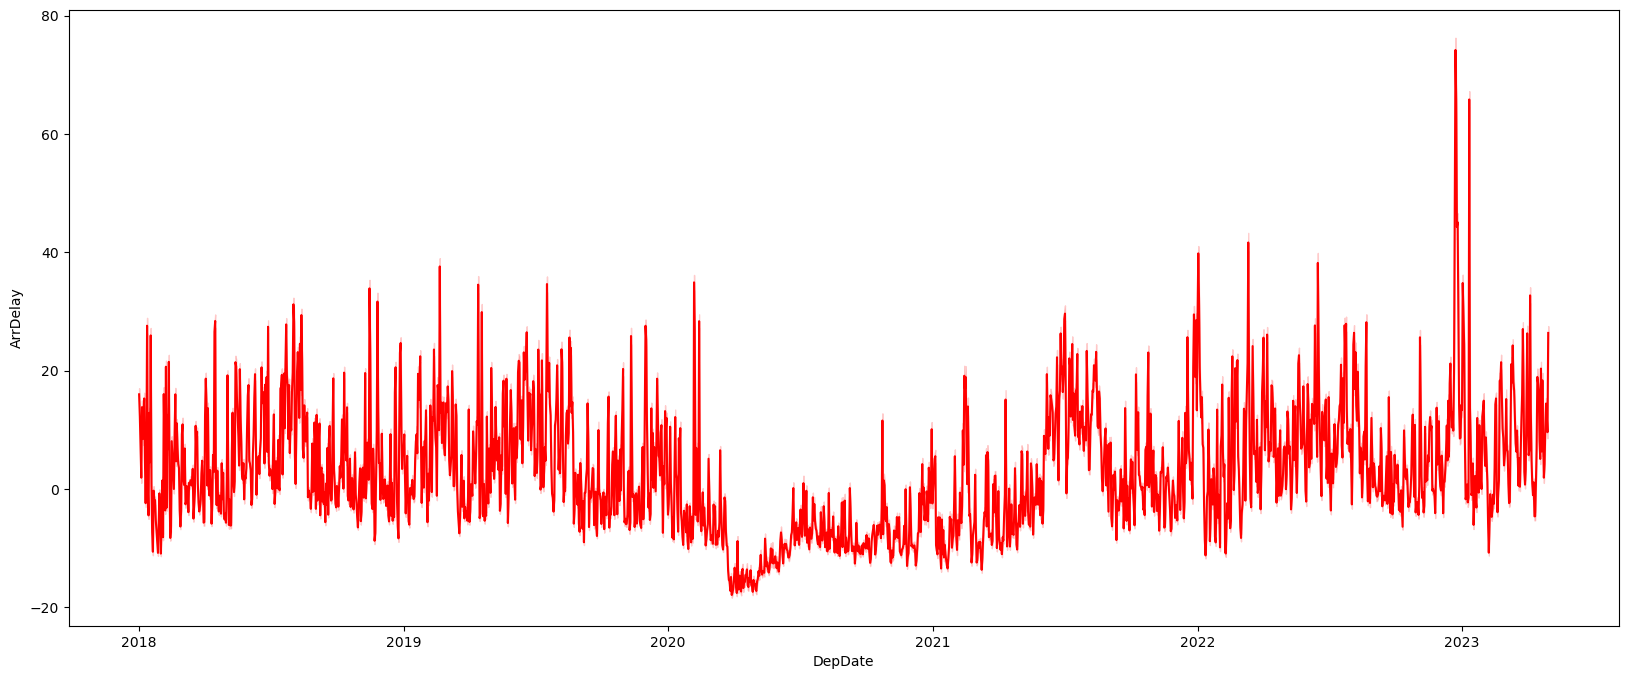

In [68]:
plt.figure(figsize = (20,8))

sns.lineplot(data = arr_delay[['DepDate','ArrDelay']], x = 'DepDate', y = 'ArrDelay', color = 'r')

The lineplot is same as departure delays through years.

**Arrival delay through months of the year**

Text(0.5, 1.0, 'Average minutes delayed by month')

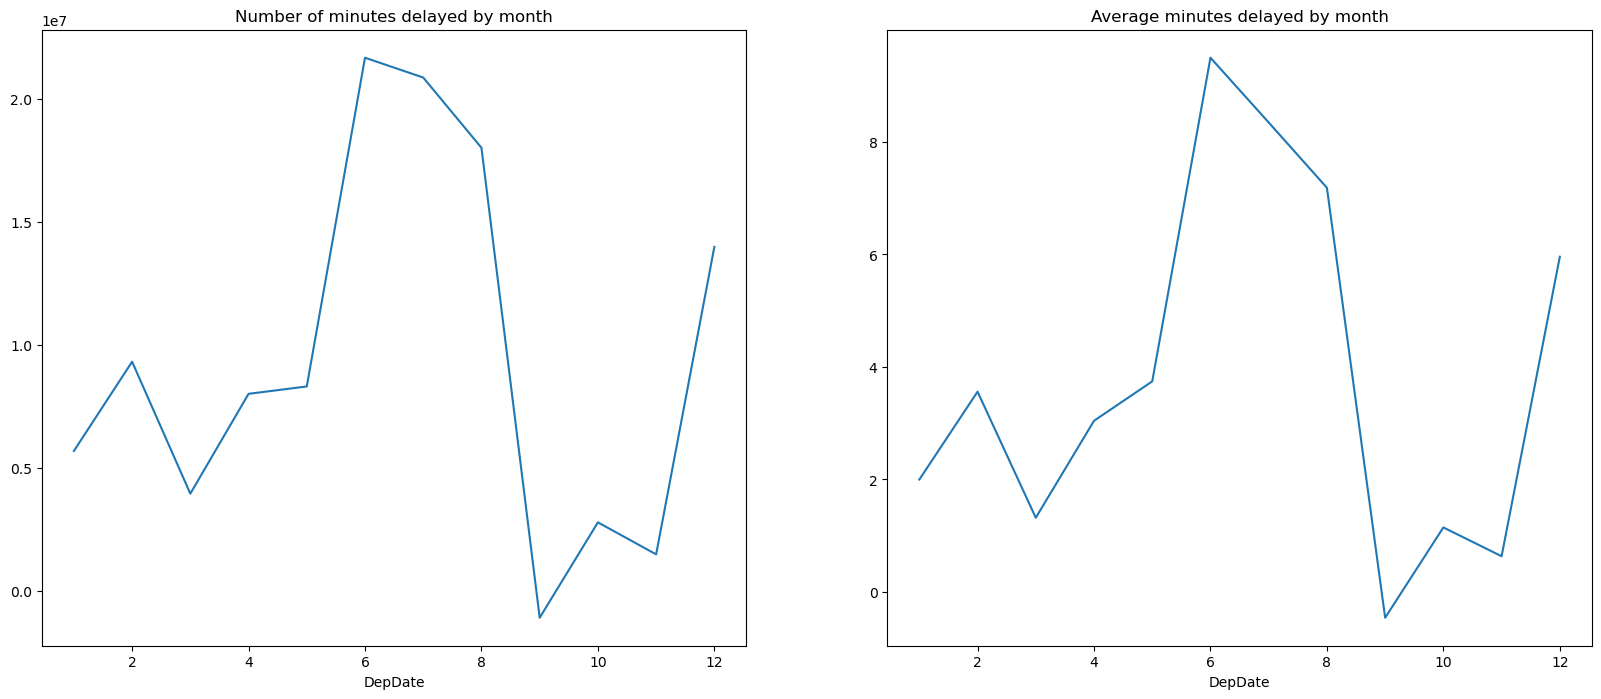

In [79]:
f, ax = plt.subplots(1, 2, figsize = (20,8))

arr_delay['ArrDelay'].groupby(arr_delay.DepDate.dt.month).sum().plot(ax = ax[0])
ax[0].set_title('Number of minutes delayed by month')

arr_delay['ArrDelay'].groupby(arr_delay.DepDate.dt.month).mean().plot(ax = ax[1])
ax[1].set_title('Average minutes delayed by month')

Average and total minutes of arrival delay are higher in the month of May to August and December.

### <a name=p5.3>Components of Arrival Delay<a/>

- Carrier Delay
- Weather Delay
- Security Delay
- Late Aircraft Delay
- NAS Delay

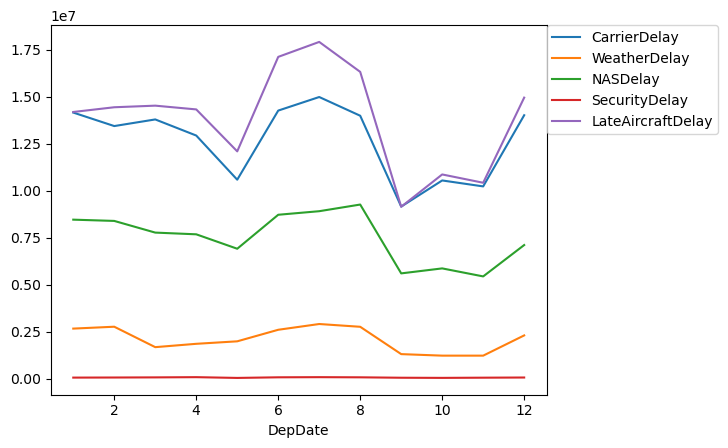

In [83]:
arr_delay[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
.groupby(arr_delay.DepDate.dt.month).sum().plot()

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1), borderaxespad = 0.0)
plt.show()

From the correlation matrix, it was intepreted that Carrier Delay, Weather Delay, LateAircraftDelay & NASDelay were main variables for arrival delay.

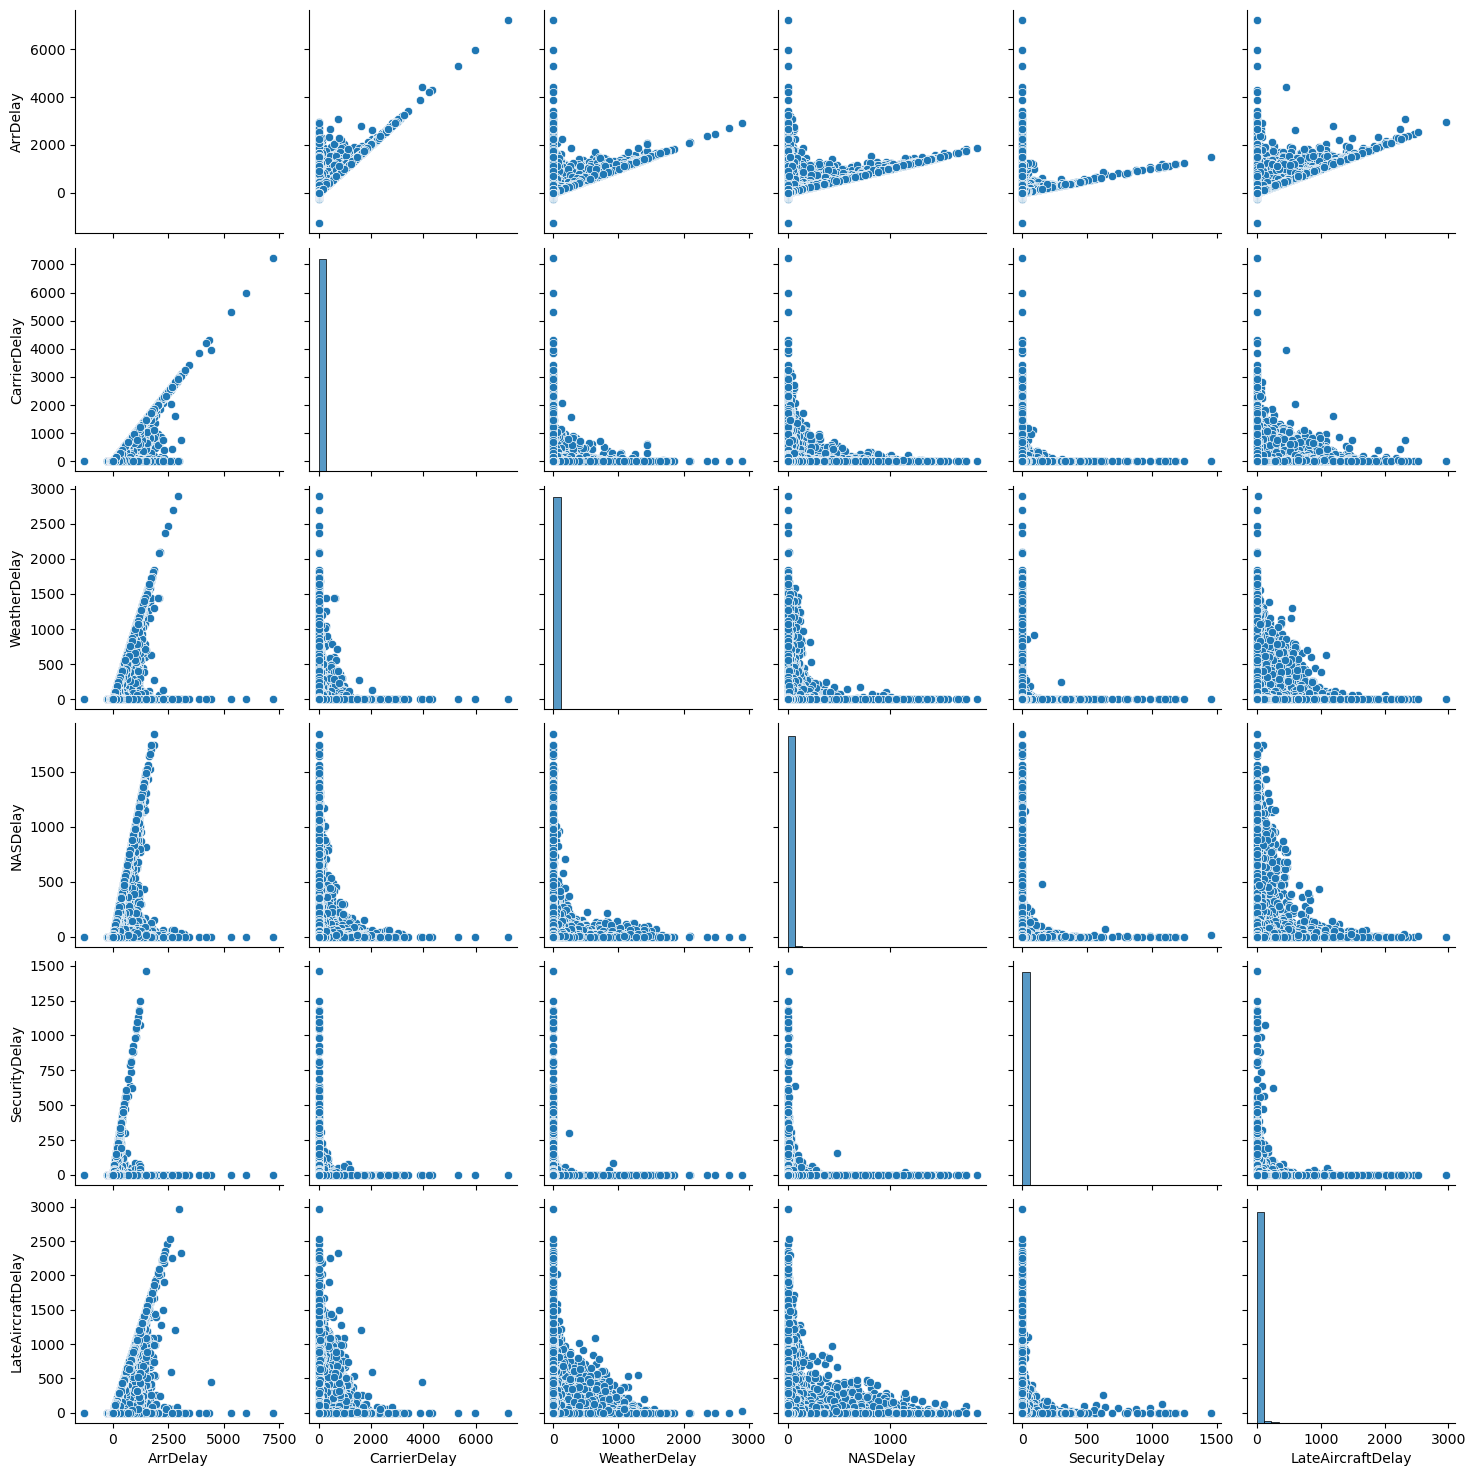

In [91]:
sns.pairplot(arr_delay[['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']])
plt.show()

**Late Aircraft Delay**: It seems to be one of the important variable and its distribution with other delays are croweded which indicates, it is affected by the other due to ripple effect and delay propogation.<br>

**Weather Delay**: From the scatter plot and line plot through months, it can be seen that weather delays are high in the month of Jan, Feb, Jul, Aug and Dec. We can dive deeper in the causes of weather delay in these months through the years by analyzing weather data from NOAA's National Centers for Environmental Information (NCEI), weather data providers, or online weather archives, but that is no within the scope of this analysis.<br>
   
**Security Delay**: There is little affect of security delay on the arrival of the flight, same was also intepreted from the corelation matrix and the line plot. This delays are longer in minutes but doesn't account for longer wait time for arrival.

#### Carrier Delay:

Text(0.5, 1.0, 'Delay Distribution by Carrier')

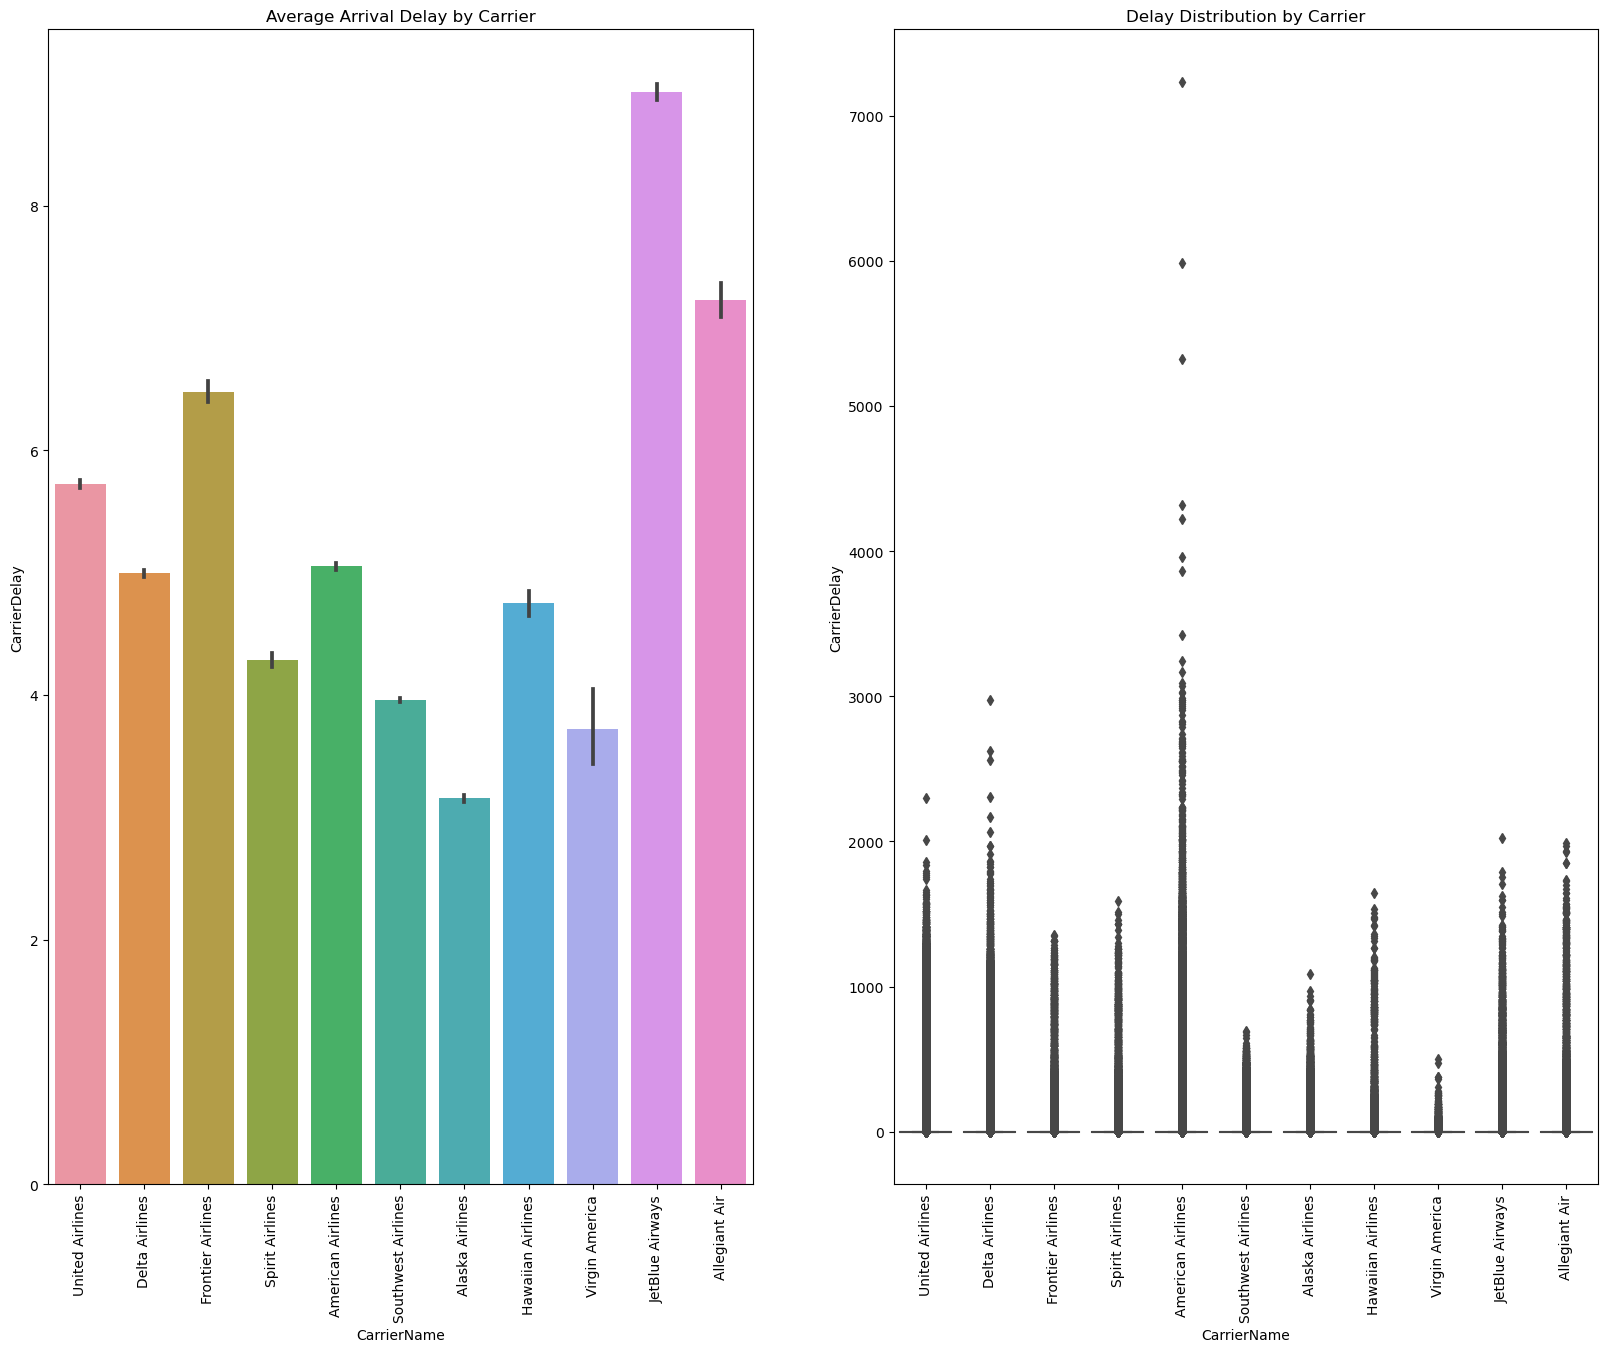

In [68]:
f, ax = plt.subplots(1, 2, figsize = (20,15))

sns.barplot(data = arr_delay[['CarrierName', 'CarrierDelay']], x = 'CarrierName', y = 'CarrierDelay', ax = ax[0])
ax[0].tick_params(axis = 'x', rotation = 90)
ax[0].set_title('Average Arrival Delay by Carrier')

sns.boxplot(data = arr_delay[['CarrierName', 'CarrierDelay']], x = 'CarrierName', y = 'CarrierDelay', ax = ax[1])
ax[1].tick_params(axis = 'x', rotation = 90)
ax[1].set_title('Delay Distribution by Carrier')

Average delay of 3 out of 11 carriers that we have are above the mean(5 minutes).
By comparing plots, it can be seen that carriers with lower volume of flights tends to have higher Carrier Delay, with the exception of Alaska Air.

#### NAS Delay:

For NAS delay we will only be considering top 20 airports with highest average delay

Text(0.5, 1.0, 'Delay Distribution by Origin City')

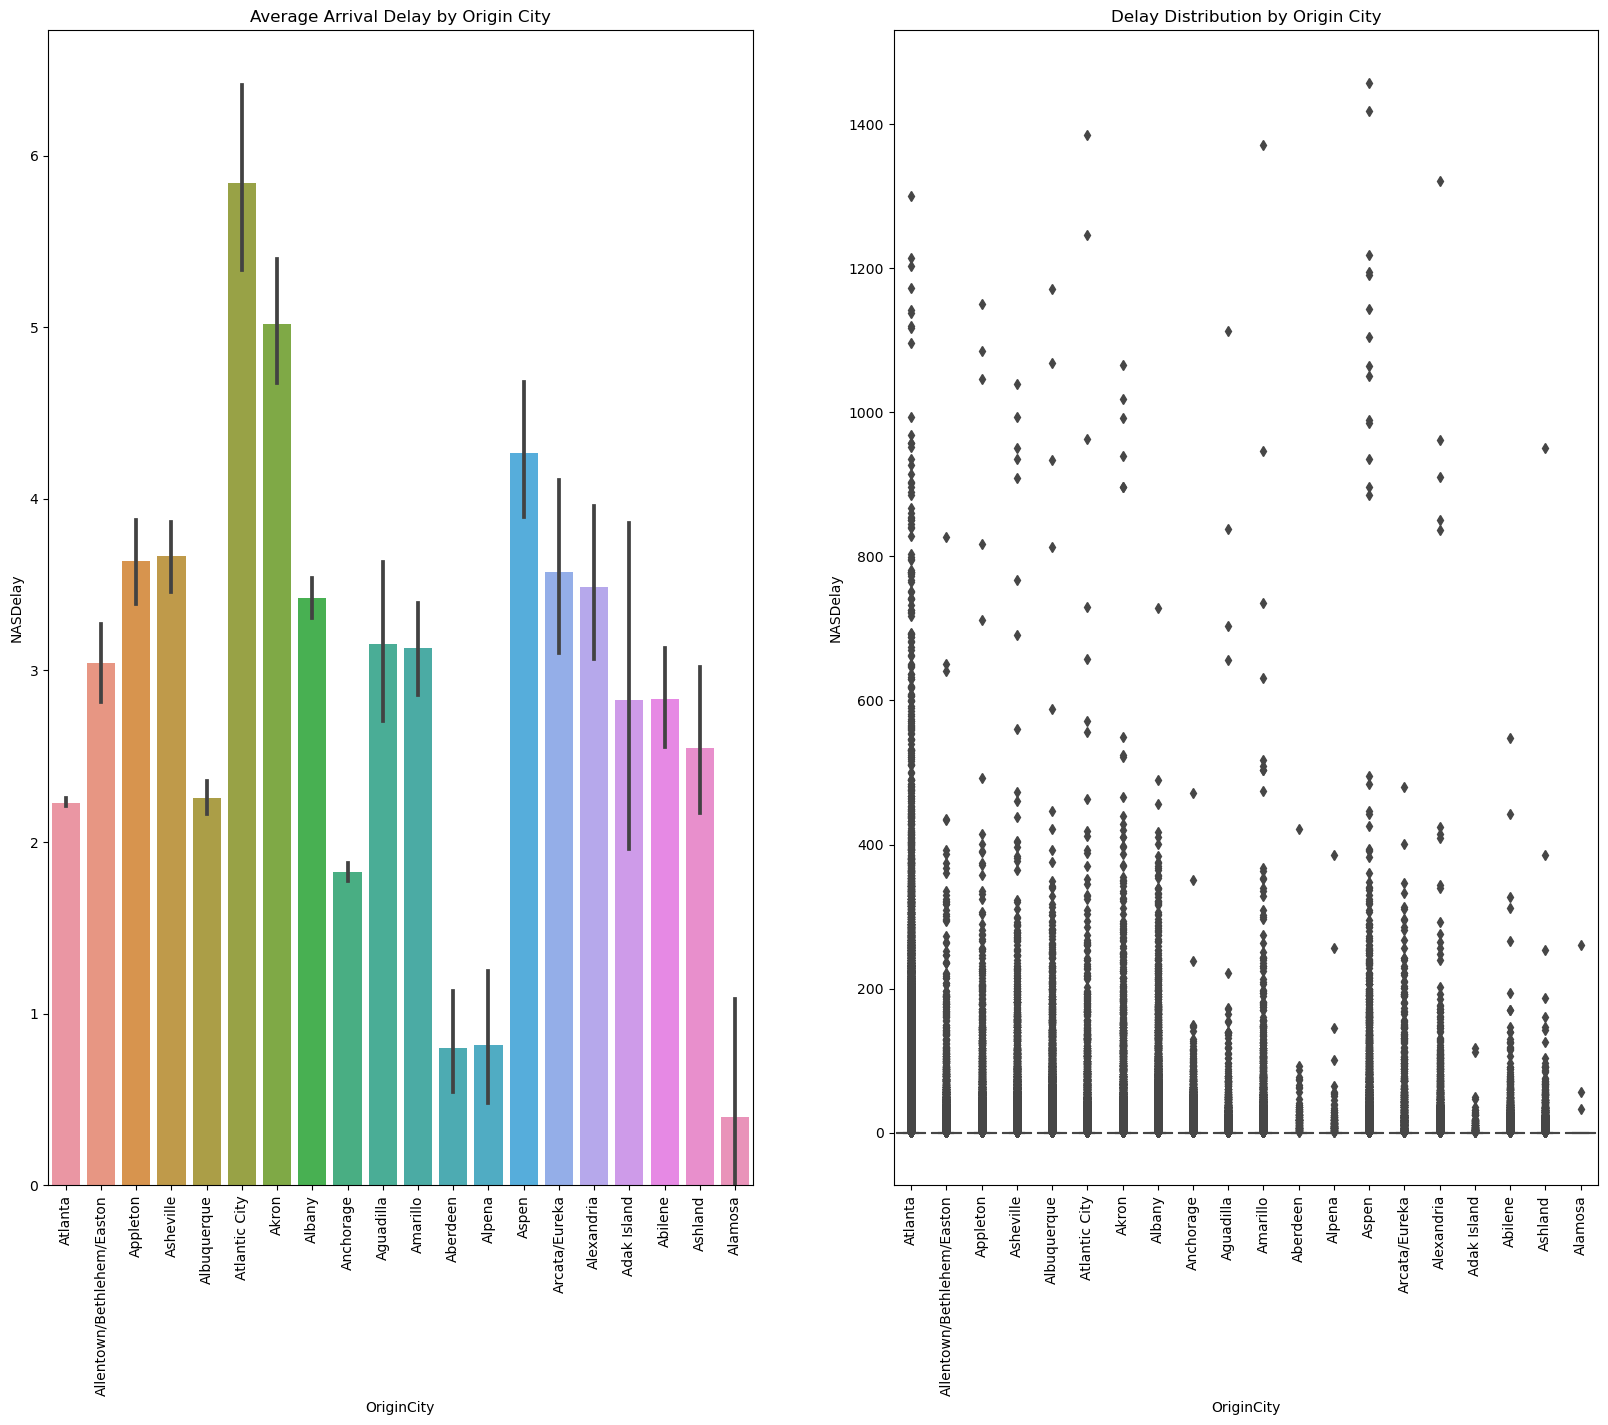

In [64]:
# Getting top 20 origin airports with highest average NAS delay
origin = arr_delay[['OriginCity', 'NASDelay']].groupby('OriginCity').mean().head(20).index

f, ax = plt.subplots(1, 2, figsize = (20,15))

sns.barplot(data = arr_delay[['OriginCity', 'NASDelay']].loc[arr_delay.OriginCity.isin(origin)].reset_index(), 
                   x='OriginCity', y='NASDelay', ax = ax[0])
ax[0].tick_params(axis = 'x', rotation = 90)
ax[0].set_title('Average Arrival Delay by Origin City')

sns.boxplot(data = arr_delay[['OriginCity', 'NASDelay']].loc[arr_delay.OriginCity.isin(origin)].reset_index(), 
                   x='OriginCity', y='NASDelay', ax = ax[1])
ax[1].tick_params(axis = 'x', rotation = 90)
ax[1].set_title('Delay Distribution by Origin City')

It can be seent that the average delay is corelated to the operations capacity of the airport.

## <a name=p6>Conclusion</a>

**Departure Delay**:<br>

- The departure delay distribution is positively skewed with a long right tail, indicating that most delays are short, but there are some unusually long delays.
- Departure delays vary throughout the day, peaking in the morning and decreasing toward the end of the day.
- The year 2020 saw a significant reduction in departure delays due to the COVID-19 pandemic.
- Frontier Airlines experienced an increase in the number of long delays in recent years, while Virgin Airlines had shorter delays.
- Hawaiian and Southwest Airlines had relatively shorter departure delays, with Southwest Airlines having significantly higher delay counts.<br>

**Arrival Delay**:<br>

- Arrival delay distribution mirrors the departure delay distribution, with a long right tail indicating occasional long delays.
- Arrival delay is strongly correlated with Carrier Delay and moderately correlated with Weather Delay, Late Aircraft Delay, and NASDelay.
- Departure delay has a profound impact on arrival delay, with a strong positive correlation.
- Arrival delays are shorter in the morning, gradually increasing, and then decreasing toward the end of the day.
- Average and total arrival delays are higher in May to August and December.
- Late Aircraft Delay appears to be an important factor, influenced by other delays, indicating a ripple effect.
- Weather Delay is more prevalent in certain months (Jan, Feb, Jul, Aug, Dec), suggesting the need for further investigation into weather conditions during those periods.
- Security Delay has minimal impact on arrival delays.
- Carrier Delay tends to be higher for carriers with lower flight volumes, except for Alaska Air.
- NASDelay is influenced by the operational capacity of airports, affecting average delay times.